# Surf's Up

### Imports

In [128]:
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda/lib/python3.6/site-packa

In [129]:
engine = create_engine('sqlite:///hawaii.sqlite')
conn = engine.connect()

In [130]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [131]:
Base.classes.keys()

['hawaii_measurements', 'hawaii_stations']

In [132]:
Station = Base.classes.hawaii_stations
Measurement = Base.classes.hawaii_measurements

In [133]:
session = Session(engine)

In [134]:
first_row = session.query(Measurement).first()

In [135]:
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1290f94e0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [136]:
last12 = session.query(Measurement.date, Measurement.prcp).first()

In [137]:
last12

('2010-01-01', 0.08)

In [138]:
meas = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).all())
# stat = pd.DataFrame(session.query(Station).all())

In [139]:
meas.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-07,0.06


In [140]:
meas2 = pd.DataFrame()
for index, row in meas.iterrows():
    parsed = row[0].replace('-', '')
    meas2.set_value(index, 'date', parsed)
    meas2.set_value(index, 'prcp', row[1])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [141]:
meas2.head()

,date,prcp
0,20100101,0.08
1,20100102,0.00
2,20100103,0.00
3,20100104,0.00
4,20100107,0.06


In [142]:
meas2.date.dtype

dtype('O')

In [143]:
meas2.date = meas2.date.astype(int)

In [144]:
meas2.head()

,date,prcp
0,20100101,0.08
1,20100102,0.00
2,20100103,0.00
3,20100104,0.00
4,20100107,0.06


In [145]:
meas3 = meas2[meas2.date > 20160824]

In [146]:
meas3.head()

,date,prcp
2328,20160825,0.08
2329,20160826,0.00
2330,20160827,0.00
2331,20160828,0.01
2332,20160829,0.00


In [147]:
 meas3.date = meas3.date.astype(str)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [150]:
# plt.figure(figsize=(20, 2))
plt.bar(meas3.date, meas3.prcp)

<Container object of 2009 artists>

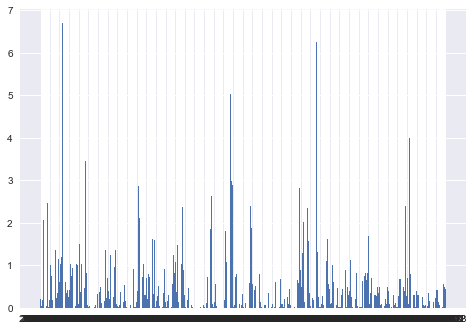

In [151]:
plt.show()

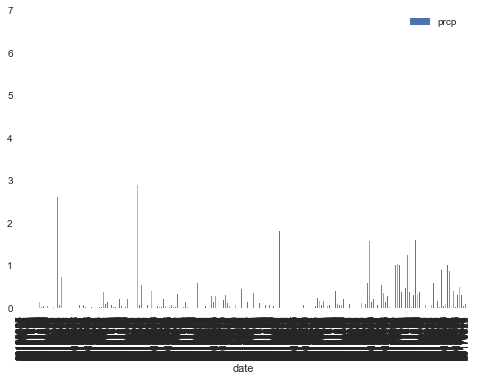

In [152]:
meas3.plot.bar('date', 'prcp')
plt.show()

In [153]:
meas3.describe()

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [155]:
first_row = session.query(Station).first()

In [156]:
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12a9dca20>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [157]:
all_stations = session.query(Station).all()

In [158]:
len(all_stations)

9

There are 9 stations in total.

In [ ]:
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1290f94e0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [159]:
all_meas = pd.DataFrame(session.query(Measurement.date, Measurement.id, Measurement.prcp, Measurement.station, Measurement.tobs).all())

In [162]:
all_stat = pd.DataFrame(session.query(Station.elevation, Station.id, Station.latitude, Station.longitude, Station.name, Station.station).all())

In [163]:
all_meas.head()

,date,id,prcp,station,tobs
0,2010-01-01,1,0.08,USC00519397,65
1,2010-01-02,2,0.00,USC00519397,63
2,2010-01-03,3,0.00,USC00519397,74
3,2010-01-04,4,0.00,USC00519397,76
4,2010-01-07,5,0.06,USC00519397,70


In [180]:
all_stat.head(15)

,elevation,id,latitude,longitude,name,station
0,3.0,1,21.27160,-157.81680,"WAIKIKI 717.2, HI US",USC00519397
1,14.6,2,21.42340,-157.80150,"KANEOHE 838.1, HI US",USC00513117
2,7.0,3,21.52130,-157.83740,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830
3,11.9,4,21.39340,-157.97510,"PEARL CITY, HI US",USC00517948
4,306.6,5,21.49920,-158.01110,"UPPER WAHIAWA 874.3, HI US",USC00518838
5,19.5,6,21.33556,-157.71139,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523
6,32.9,7,21.45167,-157.84889,"WAIHEE 837.5, HI US",USC00519281
7,0.9,8,21.31520,-157.99920,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918
8,152.4,9,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US",USC00516128


In [173]:
grouped = all_meas.groupby('station').id.count()

In [174]:
groups_sorted = grouped.sort_values(ascending=False)

In [176]:
groups_sorted.head(10)

station
USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: id, dtype: int64

Station USC00519281, Waihe'e has the highest number of observations, at 2772.

In [182]:
just_waihee = all_meas[all_meas.station == 'USC00519281']

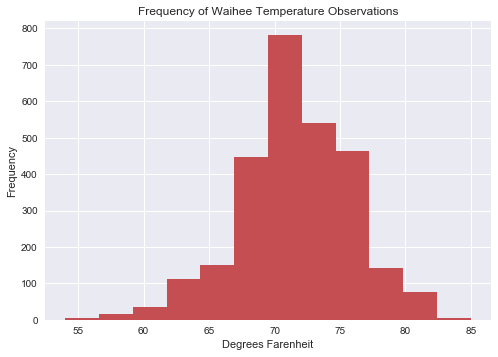

In [190]:
just_waihee.tobs.hist(bins=12)
plt.xlabel('Degrees Farenheit')
plt.ylabel('Frequency')
plt.title('Frequency of Waihee Temperature Observations')
plt.show()

### Temperature Analysis

In [195]:
all_meas.date.dtype

dtype('O')

In [196]:
all_meas.head()

,date,id,prcp,station,tobs
0,2010-01-01,1,0.08,USC00519397,65
1,2010-01-02,2,0.00,USC00519397,63
2,2010-01-03,3,0.00,USC00519397,74
3,2010-01-04,4,0.00,USC00519397,76
4,2010-01-07,5,0.06,USC00519397,70


Need to change date to int to make it filterable:

In [ ]:
new_all_meas = pd.DataFrame()
for index, row in all_meas.iterrows():
    parsed = row[0].replace('-', '')
    new_all_meas.set_value(index, 'date', parsed)
    new_all_meas.set_value(index, 'prcp', row[2])
    new_all_meas.set_value(index, 'id', row[1])
    new_all_meas.set_value(index, 'station', row[3])
    new_all_meas.set_value(index, 'tobs', row[4])

In [204]:
new_all_meas['date'] = new_all_meas['date'].astype(int)

In [205]:
new_all_meas.head()

,date,prcp,id,station,tobs
0,20100101,0.08,1.0,USC00519397,65.0
1,20100102,0.00,2.0,USC00519397,63.0
2,20100103,0.00,3.0,USC00519397,74.0
3,20100104,0.00,4.0,USC00519397,76.0
4,20100107,0.06,5.0,USC00519397,70.0


In [206]:
new_all_meas.date.dtype

dtype('int64')

In [257]:
def calc_temps(start_date, end_date):
    parsed_start = int(start_date.replace('-', ''))
    parsed_end = int(end_date.replace('-', ''))
    subset_meas = new_all_meas[(new_all_meas.date >= parsed_start) & (new_all_meas.date <= parsed_end)]
    maxtemp = subset_meas.tobs.max()
    mintemp = subset_meas.tobs.min()
    avgtemp = subset_meas.tobs.mean()
    print('For date range selected, the:\nMax temp is: ', maxtemp, '\nMin temp is: ', mintemp, '\nAverage temp is: ', avgtemp)
    return maxtemp, mintemp, avgtemp

In [258]:
maxtemp, mintemp, avgtemp = calc_temps('2011-01-05', '2011-01-27')

For date range selected, the:
Max temp is:  76.0 
Min temp is:  57.0 
Average temp is:  67.34254143646409


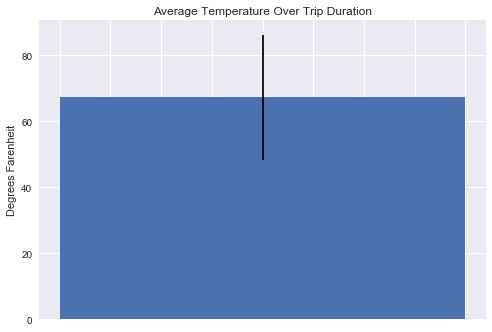

In [259]:
plt.bar(0, avgtemp, yerr=(maxtemp - mintemp))
plt.ylabel('Degrees Farenheit')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.title('Average Temperature Over Trip Duration')
plt.show()

In [251]:
adict = new_all_meas[['date', 'prcp']].set_index('date').to_dict()

In [252]:
adict

{'prcp': {20100101: 0.14,
  20100102: 0.0,
  20100103: 0.0,
  20100104: 0.0,
  20100107: 0.3,
  20100108: 0.0,
  20100109: 0.0,
  20100110: 0.01,
  20100111: 0.14,
  20100112: 0.0,
  20100114: 0.0,
  20100115: 0.0,
  20100116: 0.0,
  20100117: 0.0,
  20100118: 0.0,
  20100119: 0.0,
  20100120: 0.0,
  20100121: 0.32,
  20100122: 0.0,
  20100123: 0.0,
  20100124: 0.01,
  20100125: 0.0,
  20100126: 0.03,
  20100127: 0.31,
  20100128: 0.07,
  20100131: 1.1,
  20100201: 0.01,
  20100204: 0.0,
  20100205: 0.09,
  20100206: 0.04,
  20100207: 0.0,
  20100208: 0.0,
  20100209: 0.0,
  20100211: 0.0,
  20100212: 0.65,
  20100213: 0.62,
  20100214: 0.02,
  20100215: 0.0,
  20100216: 0.0,
  20100217: 0.02,
  20100220: 0.55,
  20100221: 0.0,
  20100222: 0.0,
  20100223: 0.0,
  20100224: 0.0,
  20100225: 0.0,
  20100226: 0.01,
  20100228: 0.2,
  20100301: 0.12,
  20100302: 0.0,
  20100303: 0.12,
  20100304: 1.41,
  20100305: 1.33,
  20100306: 0.9,
  20100307: 0.35,
  20100308: 0.7,
  20100309: 0.24,


In [255]:
anotherdict = all_stat.set_index('id').to_dict(orient='index')

In [256]:
anotherdict

{1: {'elevation': 3.0,
  'latitude': 21.2716,
  'longitude': -157.8168,
  'name': 'WAIKIKI 717.2, HI US',
  'station': 'USC00519397'},
 2: {'elevation': 14.6,
  'latitude': 21.4234,
  'longitude': -157.8015,
  'name': 'KANEOHE 838.1, HI US',
  'station': 'USC00513117'},
 3: {'elevation': 7.0,
  'latitude': 21.5213,
  'longitude': -157.8374,
  'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'station': 'USC00514830'},
 4: {'elevation': 11.9,
  'latitude': 21.3934,
  'longitude': -157.9751,
  'name': 'PEARL CITY, HI US',
  'station': 'USC00517948'},
 5: {'elevation': 306.6,
  'latitude': 21.4992,
  'longitude': -158.0111,
  'name': 'UPPER WAHIAWA 874.3, HI US',
  'station': 'USC00518838'},
 6: {'elevation': 19.5,
  'latitude': 21.33556,
  'longitude': -157.71139,
  'name': 'WAIMANALO EXPERIMENTAL FARM, HI US',
  'station': 'USC00519523'},
 7: {'elevation': 32.9,
  'latitude': 21.45167,
  'longitude': -157.84888999999995,
  'name': 'WAIHEE 837.5, HI US',
  'station': 'USC00519281'},
 8